<a href="https://colab.research.google.com/github/TurboGoose/Optimization/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Коновалов Илья группа 19-Б05.ПУ

In [ ]:
from math import exp, inf, log, sqrt
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = len("Коновалов")  # 9
B = len("Илья")       # 4
PRECISION = 5*1.e-7
RESULTS = dict()
call_count = 0

def function(x):      # Функция c подсчетом вызовов
    global call_count
    call_count += 1
    if x == 0:
        res = inf
    else:
        res = -log(x, B) + exp(A * x)
    return res


def f(x):             # Функция без подсчета вызовов
    if x == 0:
        res = inf
    else:
        res = -log(x, B) + exp(A * x)
    return res


def first_derivative(x):    # Первая производная
    global call_count
    call_count += 1
    if x == 0:
        res = - inf
    else:
        res = -1 / (log(B) * x) + A * exp(A * x)
    return res


def second_derivative(x):   # Вторая производная
    global call_count
    call_count += 1
    if x == 0:
        res = inf
    else:
        res = 1 / (log(B) * x ** 2) + A ** 2 * exp(A * x)
    return res

def drop_call_counter():
    global call_count
    call_count = 0;


def show_function():
    x = np.arange(1e-2, 0.1, 1e-5)
    fig = plt.figure(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Функция y(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    func = np.vectorize(lambda x: (inf if x==0 else -log(x, B) + exp(A * x)))
    plt.plot(x, func(x))


def truncate(f, n):
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

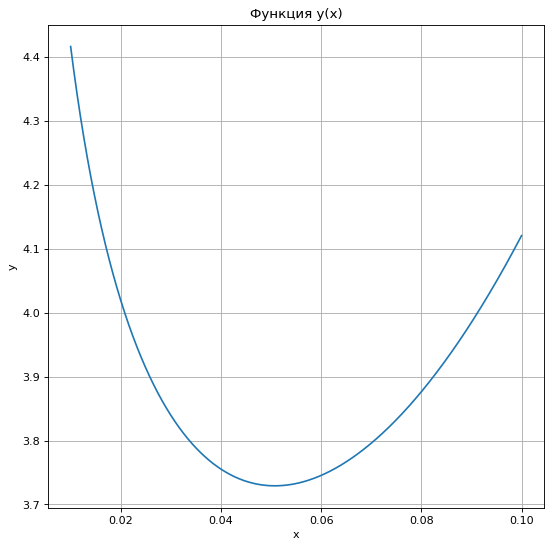

In [ ]:
show_function()

# **Метод пассивного поиска**


In [ ]:
def passive_search(a=0, b=1, precision=PRECISION):
    print(" "*10 + "x" + " "*23 + "f(x)\n" + "-"*45)
    start_time = time()
    iterations = int((b - a) / precision)
    x_min = a
    min_y = inf
    for x in np.arange(a, b, (b - a) / iterations):
        y = function(x)
        if y < min_y:
            x_min = x
            min_y = y
        if (call_count % 100000 == 0):
            print("{} | {}".format(str(x).ljust(21), str(y).ljust(21))) 
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Пассивный поиск"] = (iterations, call_count, elapsed_time_milliseconds)
    return x_min

drop_call_counter()
res_x = passive_search()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          x                       f(x)
---------------------------------------------
0.049999499999999995  | 3.7292763890561664   
0.09999949999999999   | 4.1205596971581535   
0.14999949999999998   | 5.2258933738999875   
0.1999995             | 7.210586091875347    
0.24999949999999999   | 10.487694584339806   
0.2999995             | 15.748148765560702   
0.34999949999999996   | 24.093247185800443   
0.3999995             | 37.25903470112219    
0.4499995             | 57.97320110569083    
0.4999995             | 90.51672694569025    
0.5499995             | 141.6055775294644    
0.5999995             | 221.77390327576222   
0.6499995             | 347.543562670794     
0.6999995             | 544.8267466595104    
0.7499994999999999    | 854.2624385009045    
0.7999995             | 1339.5857014678256   
0.8499994999999999    | 2100.7533695874326   
0.8999995             | 3294.5292521583315   
0.9499995             | 5166.768177503759    
0.9999994999999999    | 8103.047464140419

# **Метод дихотомии**


In [ ]:
def dichotomy_method(a=0, b=1, precision=PRECISION):
    print(" "*10 + "a" + " "*23 + "b" + " "*18 + "f(a)" + " "*18 + "f(b)\n" + "-"*85)
    start_time = time()
    iterations = 0
    delta = precision / 2
    while (b - a) / 2 > precision:
        print("{} | {} | {} | {}".format(str(a).ljust(20), str(b).ljust(20), str(f(a)).ljust(18), str(f(b))))
        middle = (a + b) / 2
        c = middle - delta
        d = middle + delta
        if function(c) > function(d):
            a = c
        else:
            b = d
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Дихотомия"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = dichotomy_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          a                       b                  f(a)                  f(b)
-------------------------------------------------------------------------------------
0                    | 1                    | inf                | 8103.083927575384
0                    | 0.50000025           | inf                | 90.51733347862148
0                    | 0.250000375          | inf                | 10.487766775500539
0                    | 0.1250004375         | inf                | 4.580226452583849
0                    | 0.06250046875        | inf                | 3.755056651026635
0.031249984374999998 | 0.06250046875        | 3.824784933104872  | 3.755056651026635
0.0468749765625      | 0.06250046875        | 3.732336699203355  | 3.755056651026635
0.0468749765625      | 0.05468797265624999  | 3.732336699203355  | 3.732214083415445
0.0468749765625      | 0.050781724609374995 | 3.732336699203355  | 3.7291583844881737
0.0488281005859375   | 0.050781724609374995 | 3.7299302386967588 | 

# **Метод золотого сечения**

In [ ]:
def golden_ratio_method(a=0, b=1, precision=PRECISION):
    print(" "*10 + "a" + " "*23 + "b" + " "*18 + "f(a)" + " "*18 + "f(b)\n" + "-"*85)
    start_time = time()
    iterations = 0
    d_coef = (sqrt(5) - 1) / 2
    c_coef = 1 - d_coef
    c = c_coef * (b - a) + a
    d = d_coef * (b - a) + a
    f_c = function(c)
    f_d = function(d)
    while (b - a) / 2 > precision:
        print("{} | {} | {} | {}".format(str(a).ljust(20), str(b).ljust(20), str(f(a)).ljust(18), str(f(b))))
        if f_c > f_d:
            a = c
            c = d
            d = d_coef * (b - a) + a
            f_c = f_d
            f_d = function(d)
        else:
            b = d
            d = c
            c = c_coef * (b - a) + a
            f_d = f_c
            f_c = function(c)
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Золотое сечение"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = golden_ratio_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          a                       b                  f(a)                  f(b)
-------------------------------------------------------------------------------------
0                    | 1                    | inf                | 8103.083927575384
0                    | 0.6180339887498949   | inf                | 260.7697737252375
0                    | 0.3819660112501051   | inf                | 31.80936896358413
0                    | 0.2360679774997897   | inf                | 9.411010609641353
0                    | 0.1458980337503154   | inf                | 5.106098716145986
0                    | 0.09016994374947422  | inf                | 3.9869535626226273
0.03444185374863301  | 0.09016994374947422  | 3.7932400222323563 | 3.9869535626226273
0.03444185374863301  | 0.06888370749726604  | 3.7932400222323563 | 3.788688055067025
0.03444185374863301  | 0.05572809000084119  | 3.7932400222323563 | 3.7340091512240257
0.042572472504416356 | 0.05572809000084119  | 3.7438690070462117 |

# **Метод Фибоначчи**

In [ ]:
def fib(value):
    f1, f2 = 1, 1
    while f1 < value:
        yield f1
        f1, f2 = f2, f1 + f2
    yield f1

def fibonacci_method(a=0, b=1, precision=PRECISION):
    print(" "*10 + "a" + " "*23 + "b" + " "*18 + "f(a)" + " "*18 + "f(b)\n" + "-"*85)
    start_time = time()
    iterations = 0
    fibs = list(fib((b - a) / precision))
    n = len(fibs)
    d = a + (b - a) * fibs[n - 2] / fibs[n - 1]
    c = a + (b - a) * fibs[n - 3] / fibs[n - 1]
    f_c = function(c)
    f_d = function(d)
    for i in range(2, n):
        print("{} | {} | {} | {}".format(str(a).ljust(20), str(b).ljust(20), str(f(a)).ljust(18), str(f(b))))

        if f_c > f_d:
            a = c
            c = d
            d = a + (b - a) * fibs[n - 1 - i] / fibs[n - i]
            f_c = f_d
            f_d = function(d)
        else:
            b = d
            d = c
            c = a + (b - a) * fibs[n - 2 - i] / fibs[n - i]
            f_d = f_c
            f_c = function(c)
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Фибоначчи"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = fibonacci_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          a                       b                  f(a)                  f(b)
-------------------------------------------------------------------------------------
0                    | 1                    | inf                | 8103.083927575384
0                    | 0.618033988749989    | inf                | 260.76977372545804
0                    | 0.3819660112500109   | inf                | 31.80936896355793
0                    | 0.23606797749997818  | inf                | 9.411010609654976
0                    | 0.1458980337500327   | inf                | 5.106098716137925
0                    | 0.09016994374994548  | inf                | 3.9869535626284067
0.03444185374985826  | 0.09016994374994548  | 3.7932400222217293 | 3.9869535626284067
0.03444185374985826  | 0.06888370749971652  | 3.7932400222217293 | 3.7886880550823596
0.03444185374985826  | 0.05572809000008722  | 3.7932400222217293 | 3.7340091512225806
0.042572472500457925 | 0.05572809000008722  | 3.7438690070610234

# **Метод касательных**

In [ ]:
def tangent_method(a=1.e-3, b=0.25, precision=PRECISION):
    print(" "*10 + "a" + " "*23 + "b" + " "*21 + "f'(a)" + " "*19 + "f'(b)\n" + "-"*93)
    start_time = time()
    iterations = 0
    f_a = function(a)
    f_b = function(b)
    df_a = first_derivative(a)
    df_b = first_derivative(b)
    while abs(b - a) > precision:
        print("{} | {} | {} | {}".format(str(a).ljust(20), str(b).ljust(20), str(df_a).ljust(23), str(df_b)))
        c = (f_b - f_a + df_a * a - df_b * b) / (df_a - df_b)
        df_c = first_derivative(c)
        f_c = function(c)
        if df_c > 0:
            b = c
            df_b = df_c
            f_b = f_c
        elif df_c < 0:
            a = c
            df_a = df_c
            f_a = f_c
        else:
            break
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Касательные"] = (iterations, call_count, elapsed_time_milliseconds)
    return (a + b) / 2

drop_call_counter()
res_x = tangent_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          a                       b                     f'(a)                   f'(b)
---------------------------------------------------------------------------------------------
0.001                | 0.25                 | -712.2661548485169      | 82.5042324454488
0.021191681853299196 | 0.25                 | -23.148041151685575     | 82.5042324454488
0.021191681853299196 | 0.1383706524964109   | -23.148041151685575     | 26.053759126603797
0.021191681853299196 | 0.06473606415734617  | -23.148041151685575     | 4.973689172583224
0.03689151978008933  | 0.06473606415734617  | -7.009134284113765      | 4.973689172583224
0.049174433868320794 | 0.06473606415734617  | -0.6588336626391822     | 4.973689172583224
0.049174433868320794 | 0.056577829354163646 | -0.6588336626391822     | 2.225992432114124
0.049174433868320794 | 0.052774819878391596 | -0.6588336626391822     | 0.8033392515560074
0.049174433868320794 | 0.05094867933001878  | -0.6588336626391822     | 0.07752310372527305
0.050055

# **Метод Ньютона-Рафсона**

In [ ]:
def newton_raphson_method(x=1, precision=PRECISION):
    print(" "*10 + "x" + " "*20 + "f'(x)" + " "*19 + "f''(x)\n" + "-"*68)
    start_time = time()
    iterations = 0
    df_x = first_derivative(x)
    while abs(df_x) > precision:
        d2f_x = second_derivative(x)
        print("{} | {} | {}".format(str(x).ljust(21), str(df_x).ljust(22), str(d2f_x)))
        x = x - df_x / d2f_x
        df_x = first_derivative(x)
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Ньютон-Рафсон"] = (iterations, call_count, elapsed_time_milliseconds)
    return x

drop_call_counter()
res_x = newton_raphson_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          x                    f'(x)                   f''(x)
--------------------------------------------------------------------
1                     | 72927.03400065801      | 656350.5194811266
0.8888901100309786    | 26828.105224184703     | 241461.16360422038
0.7777827798759781    | 9869.215317816963      | 88832.47724425694
0.6666836005670389    | 3630.330551269909      | 32684.335855074474
0.5556111110611438    | 1335.0881618234596     | 12029.814816380824
0.4446295055915825    | 490.5800995462465      | 4433.470886017866
0.333975773525038     | 179.6581842772364      | 1642.8297515427548
0.22461679453861394   | 64.73878524853917      | 625.8496935851163
0.1211753677677712    | 20.831029535341532     | 290.18206736627144
0.0493893000606708    | -0.5678967561189179    | 422.0556975472506
0.05073484937896981   | -0.009519427936504954  | 408.1173008455426
0.05075817460413616   | -2.690743816202712e-06 | 407.88664560814004

Количество итераций: 12
Количество вызовов функции: 25
Зат

# **Метод секущих**

In [ ]:
def secant_method(x1=1.e-3, x2=5*1.e-3, precision=PRECISION):
    print(" "*10 + "x1" + " "*22 + "x2" + " "*20 + "f'(x1)" + " "*18 + "f'(x2)\n" + "-"*93)
    start_time = time()
    iterations = 0
    df_x1 = first_derivative(x1)
    df_x2 = first_derivative(x2)
    while abs(x2 - x1) > precision:
        print("{} | {} | {} | {}".format(str(x1).ljust(20), str(x2).ljust(20), str(df_x1).ljust(22), str(df_x2)))
        x1, x2 = x2, x2 - (x2 - x1) / (df_x2 - df_x1) * df_x2
        df_x1 = df_x2
        df_x2 = first_derivative(x2)
        iterations += 1
    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)
    RESULTS["Секущие"] = (iterations, call_count, elapsed_time_milliseconds)
    return (x1 + x2) / 2

drop_call_counter()
res_x = secant_method()
print("Результат: x = {}, f(x) = {}".format(truncate(res_x, 5), truncate(function(res_x), 3)))

          x1                      x2                    f'(x1)                  f'(x2)
---------------------------------------------------------------------------------------------
0.001                | 0.005                | -712.2661548485169     | -134.85525334971788
0.005                | 0.005934206493155366 | -134.85525334971788    | -112.0637980543561
0.005934206493155366 | 0.010527626546123044 | -112.0637980543561     | -58.6250399615824
0.010527626546123044 | 0.015566842347097636 | -58.6250399615824      | -35.98520231998593
0.015566842347097636 | 0.023576493432181718 | -35.98520231998593     | -19.46862018802443
0.023576493432181718 | 0.033017723679954585 | -19.46862018802443     | -9.733012080465286
0.033017723679954585 | 0.042456436397312114 | -9.733012080465286     | -3.801966256502215
0.042456436397312114 | 0.04850691523718612  | -3.801966256502215     | -0.9446175127837204
0.04850691523718612  | 0.05050715699466737  | -0.9446175127837204    | -0.10270247406164579
0.0505

# **Результаты**

Все результаты

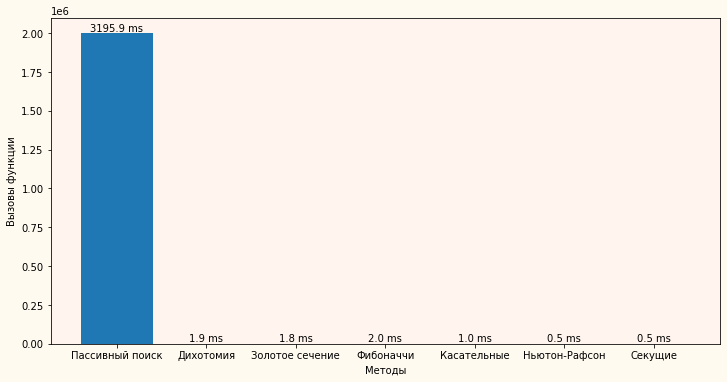

In [ ]:
def show_all_results():
    fig, ax = plt.subplots()
    for method, (iter, oper, time) in RESULTS.items():
        ax.bar(method, oper)
    plt.xlabel('Методы')
    plt.ylabel('Вызовы функции')
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    rects = ax.patches
    for rect, stats in zip(rects, RESULTS.values()):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.1f} ms".format(stats[2]), ha='center', va='bottom')
    plt.show()

show_all_results()

Результаты без учета метода пассивного поиска

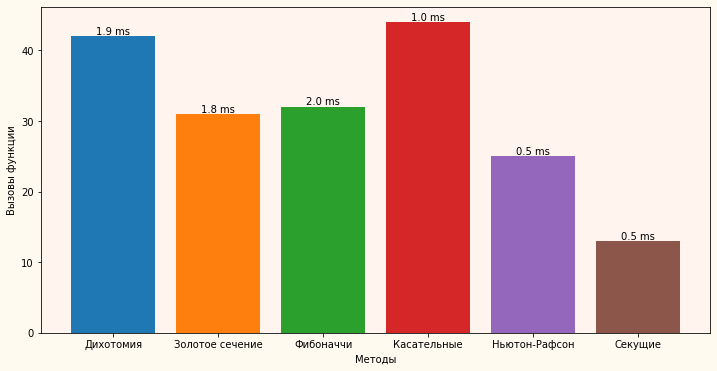

In [ ]:
def show_results_without_passive_search():
    RESULTS.pop("Пассивный поиск", None)
    fig, ax = plt.subplots()
    for method, (iter, oper, time) in RESULTS.items():
        ax.bar(method, oper)
    plt.xlabel('Методы')
    plt.ylabel('Вызовы функции')
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    rects = ax.patches
    for rect, stats in zip(rects, RESULTS.values()):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.1f} ms".format(stats[2]), ha='center', va='bottom')
    plt.show()

show_results_without_passive_search()